# Example usage of snspec

In [2]:
import snspec
import numpy as np
import matplotlib.pyplot as plt

## Smooth spectrum

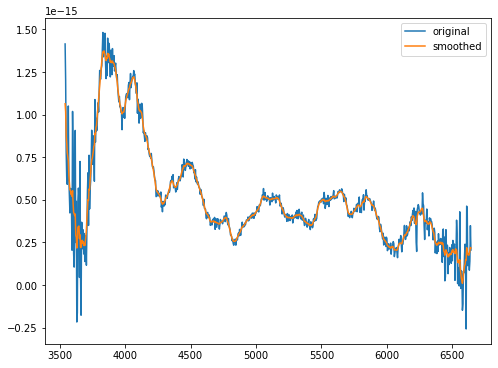

In [3]:
demo_spec = snspec.line(*list(zip(*np.loadtxt('./test_spec.txt')))) # read in demo data and create a spectrum object.
demo_spec.smooth(order=2) # Smooth spectrum. The higher the order, the smoother the spectrum.
                        # For spectra with high SNR, use low order. Unless very noisy, don't use order>=3
# demo_spec.find_continuum(min_range=[5820, 6000], max_range=[6200, 6540], binsize=40) # find continuum given wavelength range of endpoints

fig,ax = plt.subplots(figsize=(8,6))
# plot orginal and smoothed spectra
ax.plot(demo_spec.wavelength, demo_spec.flux, label='original')
ax.plot(demo_spec.wavelength, demo_spec.smoothed_flux, label='smoothed')
# ax.plot(*list(zip(demo_spec.begin, demo_spec.end)), label='continuum')
ax.legend()

## Find error of spectrum

This error will be used as the standard deviation of error's Gaussian distribution to generate artificial noisy spectrum.

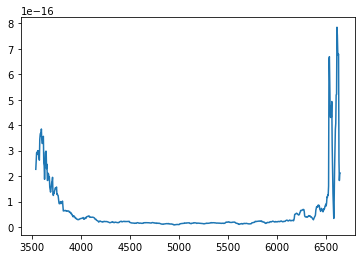

In [4]:
demo_spec.calculate_error()
fig,ax= plt.subplots()
ax.plot(demo_spec.wavelength,demo_spec.error)

## Generate Monte Carlo spectrum 

Text(0, 0.5, 'Flux + Offset')

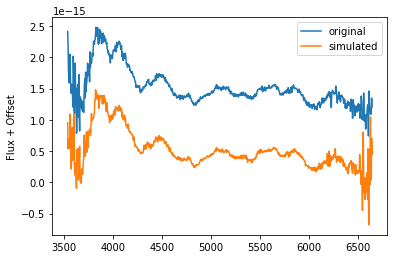

In [5]:
plt.plot(demo_spec.wavelength, demo_spec.flux+10e-16,label='original')
plt.plot(*demo_spec.simulate_noise_spectrum(),label='simulated')
plt.legend()
plt.gca().set_ylabel('Flux + Offset')

## Find the continuum of line feature

To find the continuum, we use the child class line of parent class spectrum.

Now, let's focus on the Si II 6355 line

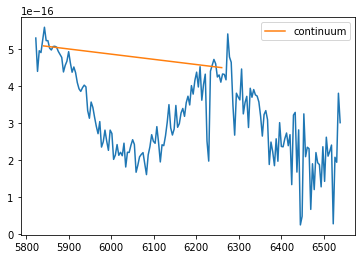

In [6]:
wl,fl=demo_spec.wavelength, demo_spec.flux
inds=(wl>5820)&(wl<6540)
wl, fl = wl[inds],fl[inds]
demo_line = snspec.line(wl,fl) # create a line class
demo_line.find_continuum(min_range=[5820, 6000], max_range=[6200, 6540])
plt.plot(demo_line.wavelength,demo_line.flux)
plt.plot(*list(zip(demo_line.begin, demo_line.end)), label='continuum')
plt.legend()

## Normalize spectrum based on the continuum found above

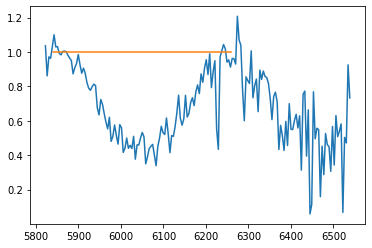

In [7]:
demo_line.normalize()
plt.plot(demo_line.wavelength, demo_line.normalized_flux)
plt.plot([demo_line.begin[0], demo_line.end[0]],[1,1])

## Calculate pEW

In [8]:
print('The pEW of this line calculated directly from it is %s AA.'%demo_line.calculate_pEW()) # calculate the pEW of this line

print('The pEW and its error of this line calculated from Monte Carlo method is %s +- %s AA.'%demo_line.calculate_pEW_MC(min_range=[5820, 6000], max_range=[6200, 6540]))

The pEW of this line calculated directly from it is 125.38955020482985 AA.
The pEW and its error of this line calculated from Monte Carlo method is 119.9777501155435 +- 6.664030268750315 AA.
